In [1]:
#K Means Clustering 

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Create the data
transactions = pd.read_excel("grocery_database.xlsx", sheet_name = "transactions")
product_areas = pd.read_excel("grocery_database.xlsx", sheet_name = "product_areas")

In [4]:
#Merge on product area name

transactions = pd.merge(transactions, product_areas, how = "inner", on = "product_area_id")

In [5]:
transactions

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14
...,...,...,...,...,...,...,...,...
38501,870,2020-08-07,436848060721,5,3,27.00,Meat,0.11
38502,870,2020-08-16,436933386887,5,4,35.34,Meat,0.11
38503,870,2020-09-21,437291420399,5,2,20.40,Meat,0.11
38504,870,2020-09-23,437316479610,5,4,51.61,Meat,0.11


In [6]:
transactions.drop(transactions[transactions["product_area_name"] == "Non-Food"].index, inplace = True)

In [7]:
#Any rows with non-food product area name have been dropped
transactions

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14
...,...,...,...,...,...,...,...,...
38501,870,2020-08-07,436848060721,5,3,27.00,Meat,0.11
38502,870,2020-08-16,436933386887,5,4,35.34,Meat,0.11
38503,870,2020-09-21,437291420399,5,2,20.40,Meat,0.11
38504,870,2020-09-23,437316479610,5,4,51.61,Meat,0.11


In [8]:
#Aggregate sales at customer level (by product area)
#Group by customer id and product area name
#We want to aggregate sales cost
transactions_summary = transactions.groupby(["customer_id", "product_area_name"])["sales_cost"].sum().reset_index()


In [9]:
transactions_summary

,customer_id,product_area_name,sales_cost
0,1,Dairy,367.74
1,1,Fruit,276.00
2,1,Meat,543.38
3,1,Vegetables,167.12
4,2,Dairy,150.63
...,...,...,...
3151,869,Vegetables,168.85
3152,870,Dairy,247.97
3153,870,Fruit,322.90
3154,870,Meat,284.26


In [10]:
#pivot data to place product areas as columns
transactions_summary_pivot = transactions.pivot_table(index = "customer_id",
                                                   columns = "product_area_name", #What columns
                                                   values = "sales_cost", #Value in cells
                                                   aggfunc = "sum", #How are we aggregating
                                                   fill_value = 0, #Value to replace missing values
                                                   margins = True, #we want a total column
                                                   margins_name = "Total").rename_axis(None,axis=1) #Give name to column, we also don't want product area name and customer id in the index

In [11]:
transactions_summary_pivot
#One row per customer
#Total in each column

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,367.74,276.00,543.38,167.12,1354.24
2,150.63,120.93,241.21,99.05,611.82
3,46.20,75.39,171.13,31.50,324.22
4,341.91,245.36,272.79,142.35,1002.41
5,694.71,815.32,1405.19,350.10,3265.32
...,...,...,...,...,...
867,129.84,176.73,180.49,88.83,575.89
868,225.59,358.89,343.26,189.24,1116.98
869,126.28,127.50,183.88,168.85,606.51


In [12]:
#Turn sales into % sales

transactions_summary_pivot = transactions_summary_pivot.div(transactions_summary_pivot["Total"], axis=0)

In [13]:
transactions_summary_pivot
#% of sales

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,0.271547,0.203804,0.401244,0.123405,1.0
2,0.246200,0.197656,0.394250,0.161894,1.0
3,0.142496,0.232527,0.527821,0.097156,1.0
4,0.341088,0.244770,0.272134,0.142008,1.0
5,0.212754,0.249691,0.430338,0.107218,1.0
...,...,...,...,...,...
867,0.225460,0.306882,0.313411,0.154248,1.0
868,0.201964,0.321304,0.307311,0.169421,1.0
869,0.208208,0.210219,0.303177,0.278396,1.0


In [14]:
#Drop the total column

data_for_clustering = transactions_summary_pivot.drop(["Total"], axis=1)

In [15]:
data_for_clustering

,Dairy,Fruit,Meat,Vegetables
customer_id,,,,
1,0.271547,0.203804,0.401244,0.123405
2,0.246200,0.197656,0.394250,0.161894
3,0.142496,0.232527,0.527821,0.097156
4,0.341088,0.244770,0.272134,0.142008
5,0.212754,0.249691,0.430338,0.107218
...,...,...,...,...
867,0.225460,0.306882,0.313411,0.154248
868,0.201964,0.321304,0.307311,0.169421
869,0.208208,0.210219,0.303177,0.278396


In [16]:
#Check for missing values 
data_for_clustering.isna().sum()

Dairy         0
Fruit         0
Meat          0
Vegetables    0
dtype: int64

In [17]:
#No missing values

In [18]:
#Normalize data
#Our values are %, between 0 and 1
#I would still normalize values...we may have one product area that makes up a large proportion of customer sales
#This will ensure proportionality across

scale_norm = MinMaxScaler()
data_for_clustering_scaled = pd.DataFrame(scale_norm.fit_transform(data_for_clustering), columns = data_for_clustering.columns)

In [19]:
data_for_clustering_scaled

,Dairy,Fruit,Meat,Vegetables
0,0.309044,0.250873,0.432358,0.164665
1,0.280196,0.243305,0.424823,0.216022
2,0.162172,0.286229,0.568751,0.129640
3,0.388187,0.301300,0.293237,0.189487
4,0.242132,0.307357,0.463709,0.143065
...,...,...,...,...
866,0.256592,0.377756,0.337714,0.205820
867,0.229852,0.395509,0.331142,0.226066
868,0.236958,0.258769,0.326687,0.371476
869,0.266506,0.375354,0.289257,0.256806


In [20]:
#I want to scale the data for clusters, but still retain data_for_clustering for profiles

C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

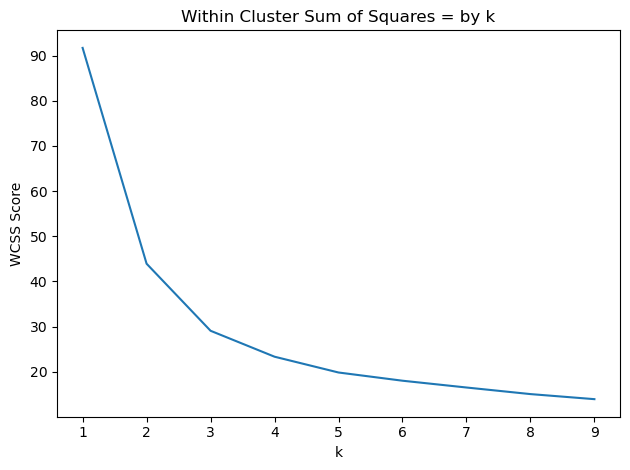

In [21]:
#WCSS to find a good value for k
k_values = list(range(1,10))
wcss_list = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_for_clustering_scaled)
    wcss_list.append(kmeans.inertia_)
plt.plot(k_values, wcss_list)
plt.title("Within Cluster Sum of Squares = by k")
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.tight_layout()
plt.show()

In [22]:
#Instantiate and fit the model
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(data_for_clustering_scaled)

C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [23]:
#Looks like around 3 clusters may be good

In [24]:
wcss_list.append(kmeans.inertia_)